# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

## Imports

In [35]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
import numpy as np
from collections import Counter
import netwulf as nw   # pip install netwulf
import seaborn as sns

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

 * Network: VPN, Nodes: Customer/Provider Devices, Links: Tunnel      
 * Network: Wikipedia, Nodes: Articles, Links: Hyperlinks (have fun: https://www.thewikigame.com)   
 * Network: Newspaper, Nodes: Journalist, Links: Articles (eg. several journalists work on the same article)

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

I am currently quite interested in labour markets. In a labour market, the nodes are companies and employees. The links are formed by contracts. Observing how this network evolves over time and reacts to shocks or comparing different labour markets, could give interesting insights into frictions and matching. The size of the network depends on the size of the underlying entity (eg. Denmark, Germany, EU). I guess the network could be fully mapped out. 

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

Obviously in the current situation, network science can assist virology and immunology to understand and limit the spread of SARS Covid-19. While the book highlights the use of networks in epidemics, this remains a temporary application. More permanently, network science could be used for the remodelling of energy systems and the stabilization of energy grids as more countries will turn to renewable energy. 

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

Lets take the Wikipedia example: An article might be linked to many other articles via hyperlinks. However, it is not linked to every article in the Wikipedia library. Hence the Wikipedia network is sparse. Linking all articles would not be feasible (and desirable). 

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

[(0, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 4), (2, 5), (2, 3), (3, 5)]


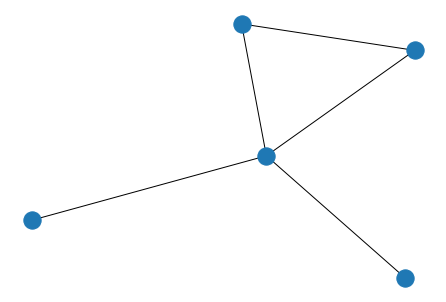

In [36]:
 G= nx.Graph()
 G.add_nodes_from(range(0, 5))
 G.add_edges_from([(1, 2), (1, 3), (1,4), (1,5), (2, 4), (5,2), (5,3)])
 G.add_edges_from(zip(range(0, 3), range(1, 5)))
 print(G.edges)
 G.remove_node(2)
 nx.draw(G)

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

The Erdős–Rényi network is a model to create a synthetic network. N nodes are created. The links between those nodes are randomly drawn. In our example, the probability that an edge is present between two nodes is 0.1. Hence, the probability that it is absent is 0.9. If the probability of edge creation is 1, all nodes are connected with eachother. 

Text(0.5, 1.0, 'Degree Distribution')

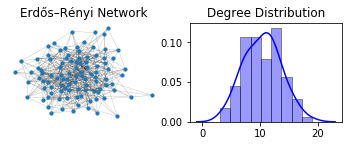

In [37]:
G= nx.erdos_renyi_graph(100, 0.1, seed=None, directed=False)
plt.subplot(221)
nx.draw(G, node_size=10, width = 0.1)
plt.title('Erdős–Rényi Network')
deg= G.degree()
degree_list= []
for i in deg:
    degree_list.append(i[1]) 

plt.subplot(222)
sns.distplot(degree_list,  hist=True, kde=True, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Degree Distribution')

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

In the Barabási–Albert (BA) network, the nodes are added sequentially and connected to m previously excisting nodes. 

Text(0.5, 1.0, 'Degree Distribution')

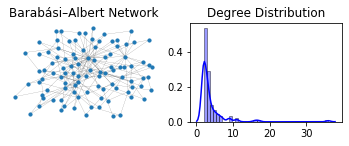

In [38]:
G= nx.barabasi_albert_graph(100, 2)
plt.subplot(221)
nx.draw(G, node_size=10, width = 0.1)
plt.title('Barabási–Albert Network')
deg= G.degree()
degree_list= []
for i in deg:
    degree_list.append(i[1]) 

plt.subplot(222)
sns.distplot(degree_list,  hist=True, kde=True, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Degree Distribution')

The distribution has more nodes with a lower degree and a few nodes with a high degree. This is a typical characteristic of the Barabási–Albert Network. Already well connected nodes are more likely to be linked to a new node. Those highly connected nodes are called hubs. Another metric to analyse the to networks are clustering coefficients.   

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [39]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [40]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)


> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [41]:
def slice(t0,t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]
    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')
    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G_t

t0 = data.timestamp.max() - 86400 * 365
t1 = data.timestamp.max() 
G_365 = slice(t0,t1)
print('number of nodes: %d \nnumber of edges: %d' % (len(G_365.nodes), len(G_365.edges)))


number of nodes: 44397 
number of edges: 201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

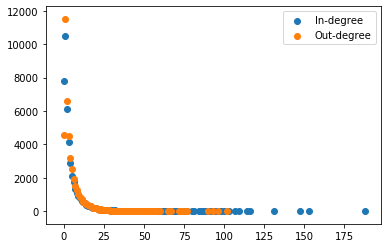

In [46]:
indeg= G_365.in_degree()
indeg_counted = Counter(dict(indeg).values())
degree = indeg_counted.keys()
occurrance = indeg_counted.values()
plt.scatter(degree,occurrance)

outdeg= G_365.out_degree()
outdeg_counted = Counter(dict(outdeg).values())
degree = outdeg_counted.keys()
occurrance = outdeg_counted.values()
plt.scatter(degree,occurrance)
plt.legend(['In-degree','Out-degree'])

#There are no data points with degree 0, which makes me wonder if I have made a mistake

#plt.yscale('log')
#plt.xscale('log') 

The degree distribution looks similar to the distribution in the Barabási–Albert Network. A few nodes are highly connected. In our Facebook dataset, those hubs are the most popular and well-known people.

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

Text(0.5, 0, 'Clustering Coefficients')

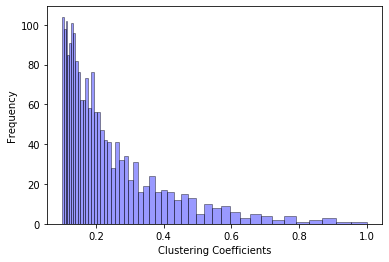

In [10]:
coefficients=nx.clustering(G_365)
coeff_counter=Counter(dict(coefficients).values())
coeff, counts = zip(*coeff_counter.items())

sns.distplot(coeff, bins=np.logspace(np.log10(0.1),np.log10(1.0), 50),hist=True,  kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency')
plt.xlabel('Clustering Coefficients')
#The histogram looks similar to the probability density function of an exponential distribution

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [32]:
#we are not interested in the behaviour of isolates/singletons. Hence we can remove all nodes with degree zero.

G_365.remove_nodes_from(list(nx.isolates(G_365)))

#Unsurprisingly, this does not remove any nodes. As we know from above, there are no nodes with zero in-degree/out-degree. Since the distribution of clustering coefficients is very heavy tailed, it might make sense to curtail the network. As thresholds, I remove the nodes below the 25 percentile and above the 75 percentile.

coeff_dict = dict(coefficients)
low_threshold = np.percentile(coeff,q= 25)
upp_threshold = np.percentile(coeff,q= 75)
from statistics import mean
mean = mean(coeff)
print('lower bound: %f \nupper bound: %f \nmean: %f' % (low_threshold, mean, upp_threshold)) 

G_365_too_low = {k:v for k, v in  coeff_dict.items() if v <= low_threshold}
G_365_too_high = {k:v for k, v in  coeff_dict.items() if v >= upp_threshold}

G_365.remove_nodes_from(list(G_365_too_low.keys()))
G_365.remove_nodes_from(list(G_365_too_high.keys()))

print('Number of nodes after curtailing: %d \nNumber of edges after curtailing: %d ' % (len(G_365.nodes()), len(G_365.edges())))
#This does not result in the desired reduction to 5000 nodes and 20000 edges, but it reduced the number of nodes by more than 80%. I guess that a further reduction using this heuristic will hamper the interpretability

lower bound: 0.038235 
upper bound: 0.099888 
mean: 0.123865
Number of nodes after curtailing: 8312 
Number of edges after curtailing: 40768 


In [33]:
network_plot, config = nw.visualize(G_365)

#Technically, the browser plot can be imported into the workbook via the following code. However, I couldn't open the jupyter workbook again after running this. 

#fig, ax = nw.draw_netwulf(network_plot)
#plt.show()

The plot looks like a big hairball.